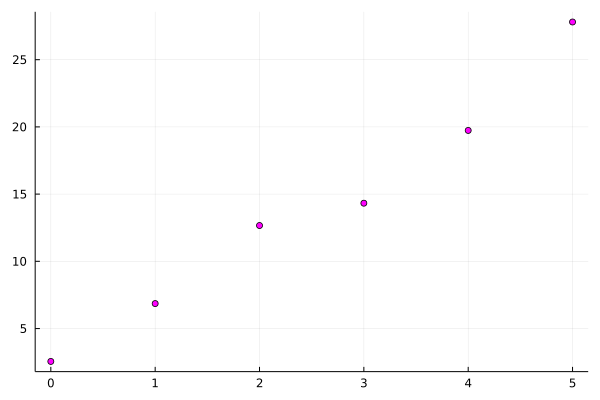

In [1]:
using Flux
using Plots

# Target Function
target_function(x) = 4x + 2 + (rand()*rand(1:5))^(rand(1:2))


# Create Artificial Data
x_train, x_test = hcat(0:5...), hcat(6:10...)
y_train, y_test = target_function.(x_train), target_function.(x_test)

scatter(x_train, y_train, color = "magenta", legend = false)


In [2]:
# Define a simple model with one input node
model = Dense(1, 1)

println("model weight variable = $(model.W)")
println("model bias variable = $(model.b)")

model weight variable = Float32[-0.59826684;;]
model bias variable = Float32[0.0]


In [3]:
# Models are predictive functions
model(x_train)

1×6 Matrix{Float32}:
 0.0  -0.598267  -1.19653  -1.7948  -2.39307  -2.99133

In [4]:
# Define Mean Squared Error Loss Function
loss(x, y) = Flux.Losses.mse(model(x), y)

loss(x_train, y_train)

325.35537828017743

In [5]:
# Define Gradient Descent Optimizer
opt = Flux.Descent()

# Format your Data
data = [(x_train, y_train)]

# Collect weights and bias for your Models
parameters = Flux.params(model)

Params([Float32[-0.59826684;;], Float32[0.0]])

In [6]:
# Train the model over one epoch
Flux.train!(loss, parameters, data, opt)

loss(x_train, y_train)

308.8964811257759

In [7]:

# Now train over 1_000 epochs
for epoch in 1:1_000
    Flux.train!(loss, parameters, data, opt)
end

loss(x_train, y_train)

1.8519217032706017

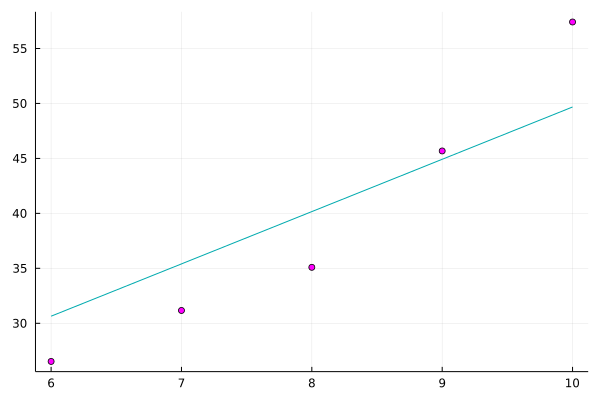

In [12]:
scatter(x_test, y_test, color = "magenta")
domain = LinRange(6, 10, 100)

plot!(domain, domain .* model.W .+ model.b, legend = false)

In [14]:
using RDatasets
using DataFrames
using Flux 

iris = RDatasets.dataset("datasets", "iris")

X = iris[51:150, :PetalLength]
X = X'

y = iris[51:150, :Species]
y = [flower == "versicolor" ? 0 : 1 for flower in y]
y = y'

model = Dense(1, 1, Flux.σ)
model(X)

1×100 Matrix{Float64}:
 0.0445174  0.0504094  0.0392856  …  0.0325293  0.0286642  0.0346464

In [15]:
# Define binary cross entropy loss for logistic regression
loss(x, y) = Flux.Losses.binarycrossentropy(model(x), y)

loss(X, y)

1.8565276814791694

In [16]:
# Define gradient descent optimizer
opt = Flux.Descent()

# Format your Data
data = [(X, y)]

# Collect weights and bias for your model
parameters = Flux.params(model)

# Train the model over one epoch
Flux.train!(loss, parameters, data, opt)

loss(X, y)

1.2194990210881782

In [17]:
# Now train over 5_000 epochs
for epoch in 1:10_000
    Flux.train!(loss, parameters, data, opt)
end

loss(X, y)

0.2301409776858232

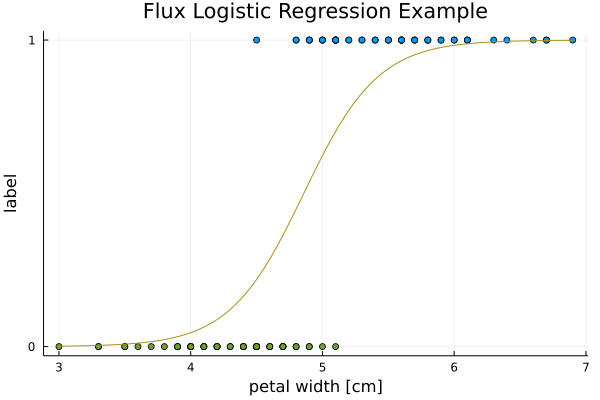

In [22]:
using Plots
xmin = minimum(X)
xmax = maximum(X)
domain = LinRange(xmin, xmax, 100)
scatter(X, y, 
        xlabel = "petal width [cm]",
        ylabel = "label",
        yticks = [0, 1], 
        color = y, 
        legend = false)
plot!(domain, model(domain')', legend = false)
plot!(title = "Flux Logistic Regression Example")

In [25]:

# Define feature vectors for multilayer neural network
X = Matrix(iris[!, [:SepalLength, :SepalWidth, :PetalLength]])
X = X'

y = iris[!, :Species]
y = Flux.onehotbatch(y, ["setosa", "versicolor", "virginica"])

3×150 OneHotMatrix(::Vector{UInt32}) with eltype Bool:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     1  1  1  1  1  1  1  1  1  1  1  1

In [24]:
model = Flux.Chain(
                    Dense(3, 40, Flux.σ),
                    Dense(40, 40, Flux.σ),
                    Dense(40, 3),
                    Flux.softmax,
                )

model(X)

3×150 Matrix{Float64}:
 0.0819289  0.0814786  0.0820295  …  0.0787533  0.0793961  0.0792407
 0.249092   0.252224   0.249933      0.266244   0.263148   0.264787
 0.668979   0.666298   0.668038      0.655003   0.657456   0.655973

In [26]:
# Define mean squared error loss function
loss(x, y) = Flux.Losses.mse(model(x), y)

loss(X, y)

0.28087201902426495

In [27]:
# Define gradient descent optimizer
opt = Flux.Descent()

# Format your data
data = [(X, y)]

# Collect weights and bias for your model
parameters = Flux.params(model)

# Train the model over one epoch
Flux.train!(loss, parameters, data, opt)

loss(X, y)

0.2736916792734805

In [28]:
for epoch in 1:10_000
    Flux.train!(loss, parameters, data, opt)
end

loss(X, y)

0.019947280078750396

In [29]:
sum(argmax(y[:, i]) != argmax(model(X[:, i])) for i in 1:150)

5

In [ ]:
plot(X[:, 1], model(X))

In [ ]:
X = Matrix(iris[!, [:SepalLength, :SepalWidth]])
X = X'

y = iris[!, :Species]
y = Flux.onehotbatch(y, ["setosa", "versicolor", "virginica"])

model = Flux.Chain(
                    Dense(2, 60, Flux.σ),
                    Dense(60, 60, Flux.σ),
                    Dense(60, 3),
                    Flux.softmax,
                )

model(X)

In [ ]:
predict(x, model) =argmax(model(x))

In [ ]:
predict(X[:, 1], model)